#Quadratic Discriminant Analysis
Demo on model training, testing and visualizing from two class classification


Codes from scikit-learn's example : https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py

and http://scikit-learn.sourceforge.net/0.6/auto_examples/plot_lda_vs_qda.html

read more about QDA : https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html


###Import libraries

In [ ]:
from scipy import linalg
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA



###generating dummy training data and visualize

In [ ]:
def dataset_cov():
    """Generate 2 Gaussians samples with different covariance matrices"""
    n, dim = 100, 2
    np.random.seed(0)
    C = np.array([[0.0, -1.0], [2.5, 0.7]]) * 2.0
    X = np.r_[
        np.dot(np.random.randn(n, dim), C),
        np.dot(np.random.randn(n, dim), C.T) + np.array([5, 12]),
    ]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

In [ ]:
X , y = dataset_cov()

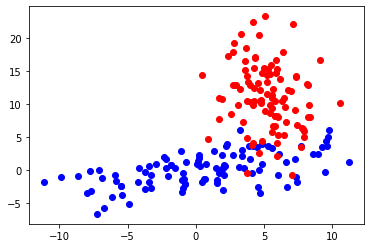

In [ ]:
plt.scatter(X[y==0][:,0], X[y==0][:,1], c='b', label='0')
plt.scatter(X[y==1][:,0], X[y==1][:,1], c='r', label='0')
plt.show()

###training QDA and visualizing obtained distributions

In [ ]:
# QDA
qda = QDA(store_covariance=True)
qda.fit(X, y)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [ ]:
def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1]/u[0])
    angle = 180 * angle / np.pi # convert to degrees
    ell = mpl.patches.Ellipse(mean, 4 * v[0] ** 0.5, 4 * v[1] ** 0.5,
                                            180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.plot(mean[0],mean[1],"*",color="yellow",markersize=15)

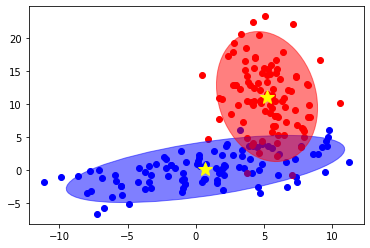

In [ ]:
splot = plt.figure()
splot = plt.subplot(1, 1, 1)

splot.scatter(X[y==0][:,0], X[y==0][:,1], c='b', label='0')
splot.scatter(X[y==1][:,0], X[y==1][:,1], c='r', label='0')

plot_ellipse(splot, qda.means_[0], qda.covariance_[0], 'b')
plot_ellipse(splot, qda.means_[1], qda.covariance_[1], 'r')

###plot decision boundary

In [ ]:
xx, yy = np.meshgrid(np.linspace(-15, 15, 200), np.linspace(-10, 25, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
probabilities_qda = qda.predict_proba(X_grid)[:,1].reshape(xx.shape)

print(xx.shape,yy.shape,X_grid.shape,probabilities_qda.shape)

(200, 200) (200, 200) (40000, 2) (200, 200)


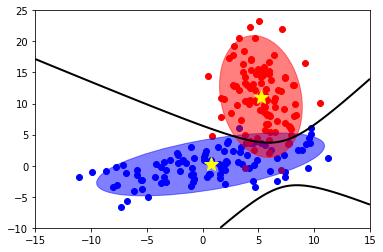

In [ ]:
plt.figure()
splot = plt.subplot(1, 1, 1)

splot.scatter(X[y==0][:,0], X[y==0][:,1], c='b', label='0')
splot.scatter(X[y==1][:,0], X[y==1][:,1], c='r', label='0')

plot_ellipse(splot, qda.means_[0], qda.covariance_[0], 'b')
plot_ellipse(splot, qda.means_[1], qda.covariance_[1], 'r')


plt.contour(xx, yy, probabilities_qda, [0.5], linewidths=2., colors='k')
plt.show()